In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynadojo.systems.gilpin_flows import GilpinFlowsSystem
from dynadojo.wrappers import SystemChecker, AlgorithmChecker
from dynadojo.utils.lds import plot
from dynadojo.baselines.sindy import SINDy
from dynadojo.challenges import FixedComplexity
from dynadojo.baselines.lr import LinearRegression

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

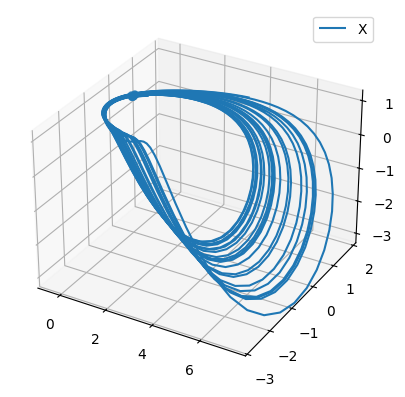

In [3]:
# plotting in-distribution trajectories
n=10
timesteps = 250
system = SystemChecker(GilpinFlowsSystem(system_name='SprottJerk', pts_per_period=80, seed=42))
x0 = system.make_init_conds(n)
x = system.make_data(x0, timesteps=timesteps)
plot([x], labels=["X"])

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

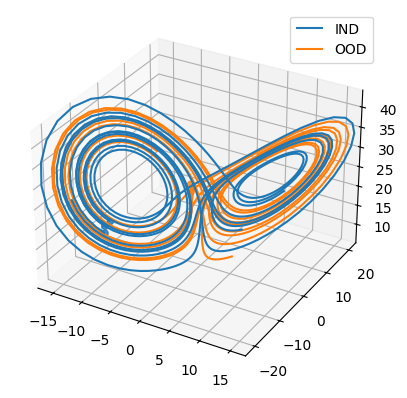

In [4]:
# plotting in-distribution and out-of-distribution trajectories
n = 5
test_size = 3
timesteps = 300
system = SystemChecker(GilpinFlowsSystem(seed=1900))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(10, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=3, labels=["IND", "OOD"], max_lines=test_size)

(5, 1, 3)
(10, 1, 3)


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

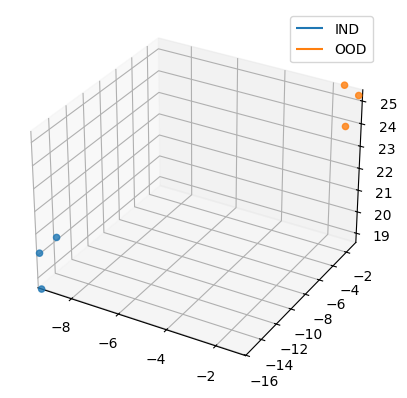

In [5]:
# plotting in-distribution and out-of-distribution initial conditions
import numpy as np

x0_3d = np.expand_dims(x0, axis=1)
y0_3d = np.expand_dims(y0, axis=1)

print(x0_3d.shape)
print(y0_3d.shape)

plot([x0_3d, y0_3d], target_dim=3, labels=["IND", "OOD"], max_lines=test_size)

y_err=13.996383093608848


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

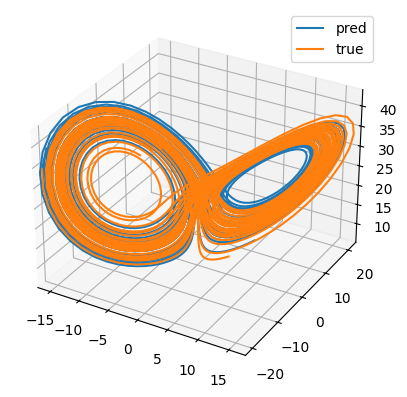

In [6]:
embed_dim = 3
sindy = AlgorithmChecker(SINDy(embed_dim, timesteps, max_control_cost=0, seed=100))
sindy.fit(x)
y_pred = sindy.predict(y[:, 0], timesteps)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")
plot([y_pred, y], target_dim=3, labels=["pred", "true"], max_lines=15)

In [7]:
challenge = FixedComplexity(
    N=[10, 50, 100, 500],
    l=3,
    e=3,
    t=50,
    control_horizons=0,
    max_control_cost_per_dim=0,
    system_cls=GilpinFlowsSystem,
    trials=10,
    test_examples=50,
    test_timesteps=50,
    system_kwargs={"system_name": "Lorenz"},
)
data = challenge.evaluate(LinearRegression, id="linear regression")

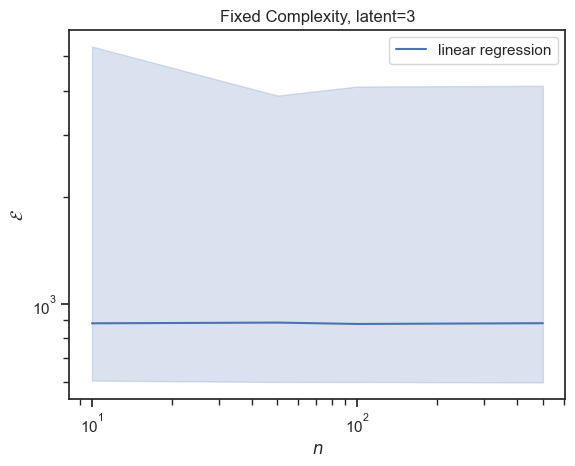

<Axes: title={'center': 'Fixed Complexity, latent=3'}, xlabel='$n$', ylabel='$\\mathcal{E}$'>

In [8]:
challenge.plot(data)

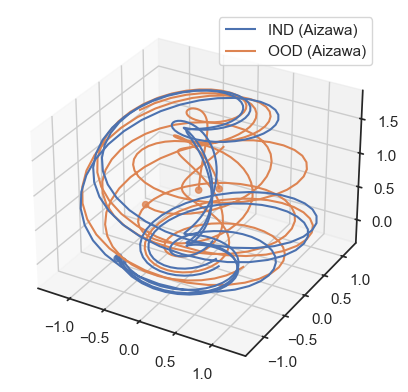

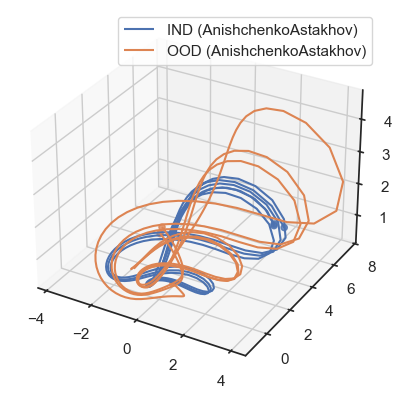

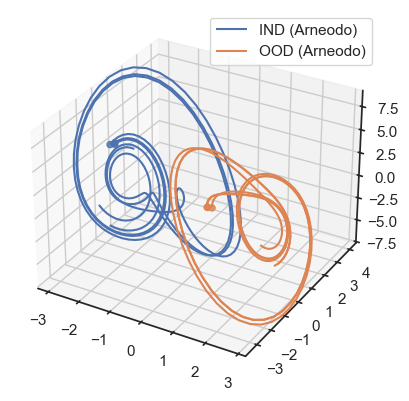

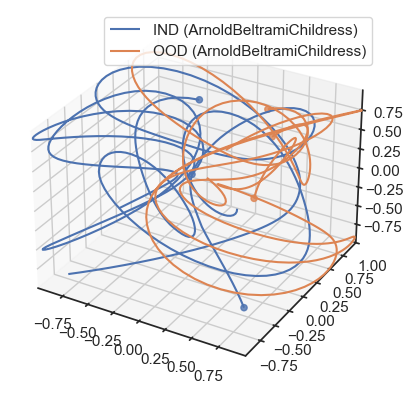

Inputted embedded dimension of 3, but Gilpin's system has an embedded dimension of 5. Adjusting the embedded dimension to 5.
Inputted latent dimension of 3, but Gilpin's system has a dimension of 5. Adjusting the latent dimension to 5.


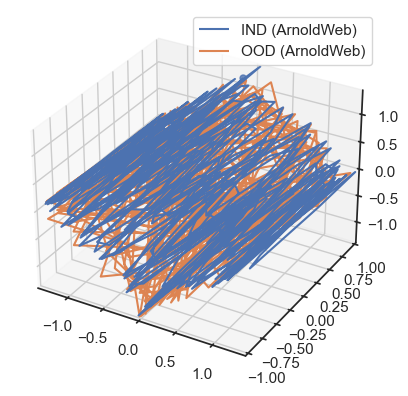

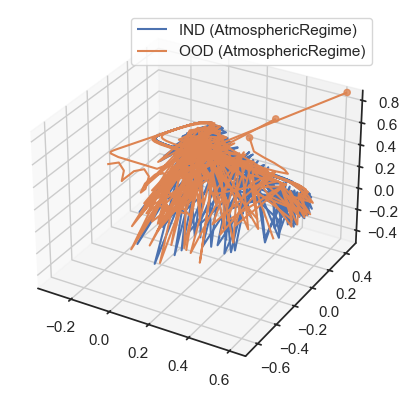

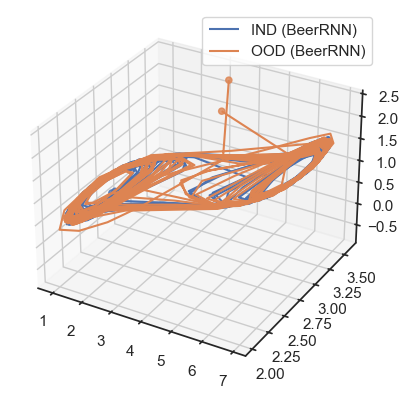

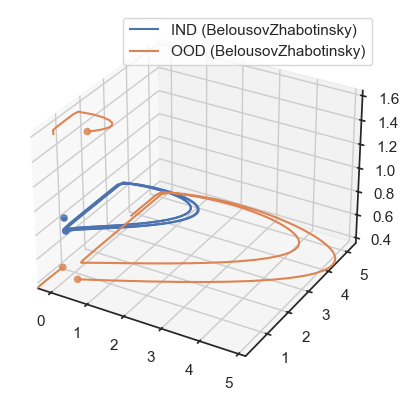

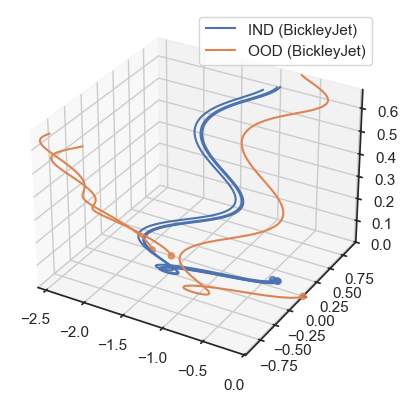

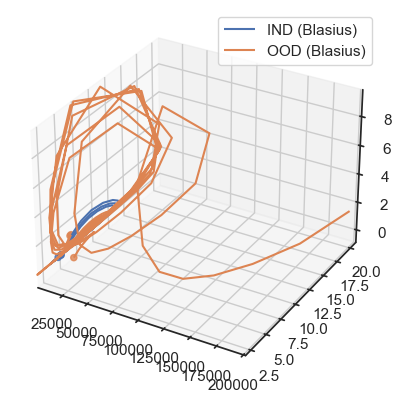

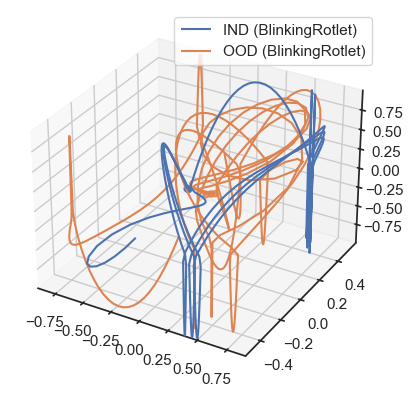

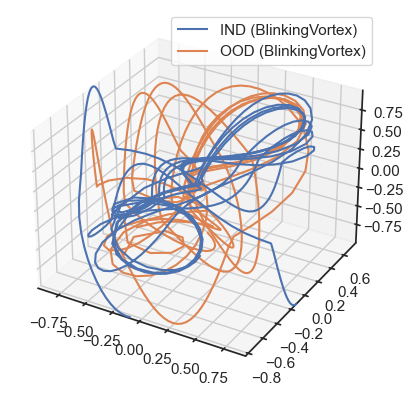

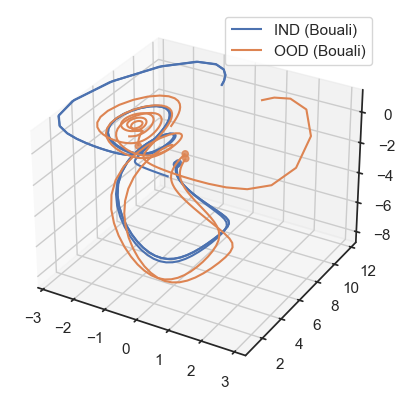

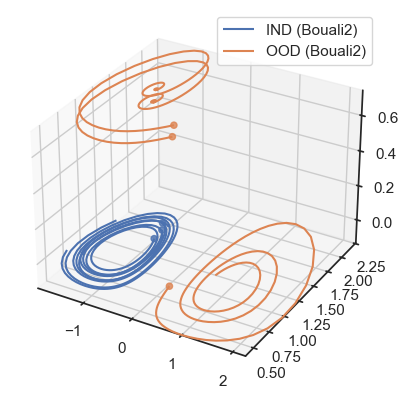

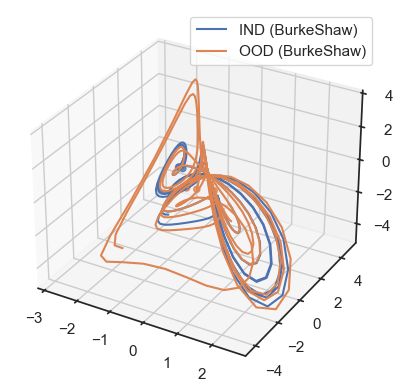

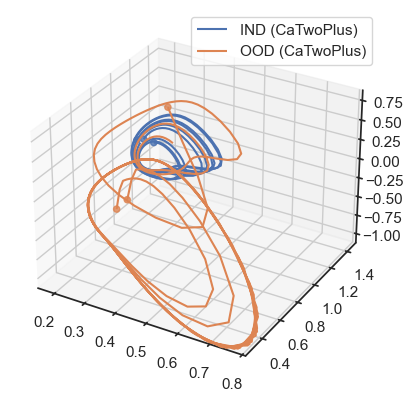

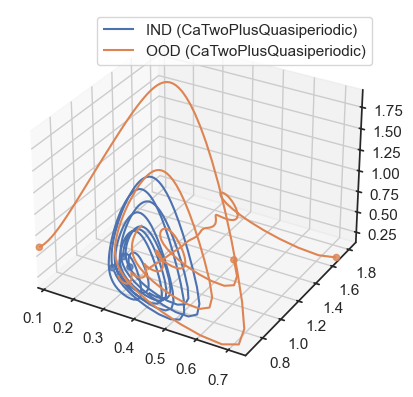

Inputted embedded dimension of 3, but Gilpin's system has an embedded dimension of 6. Adjusting the embedded dimension to 6.
Inputted latent dimension of 3, but Gilpin's system has a dimension of 6. Adjusting the latent dimension to 6.


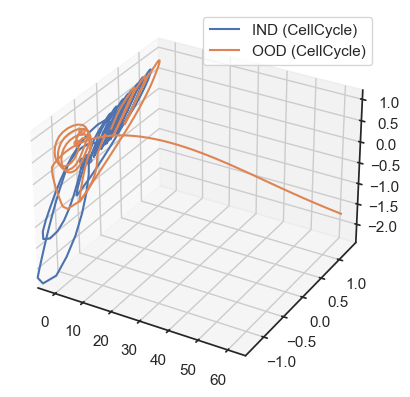

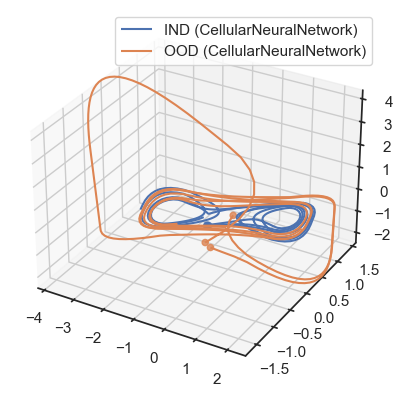

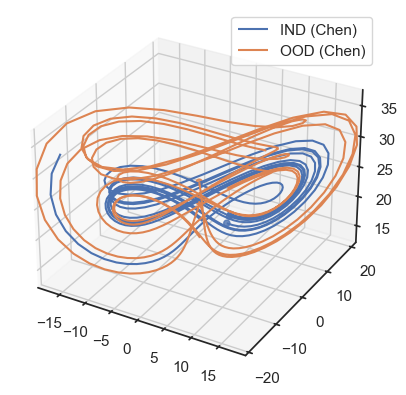

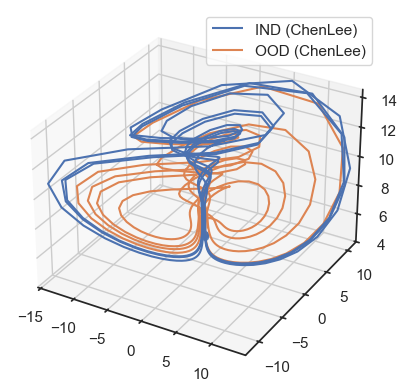

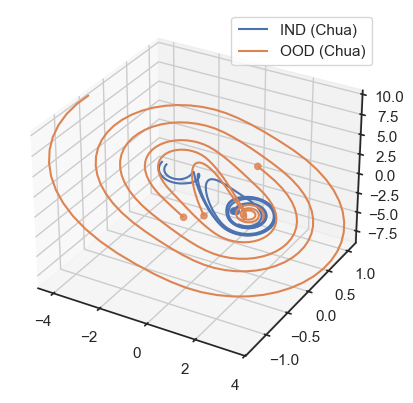

Inputted embedded dimension of 3, but Gilpin's system has an embedded dimension of 5. Adjusting the embedded dimension to 5.
Inputted latent dimension of 3, but Gilpin's system has a dimension of 5. Adjusting the latent dimension to 5.


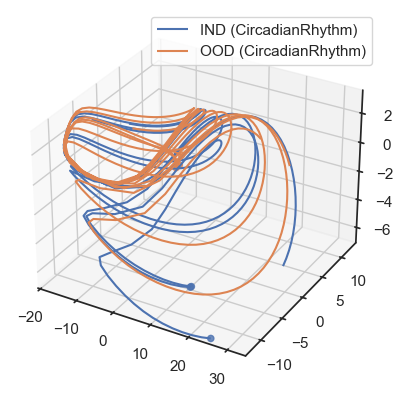

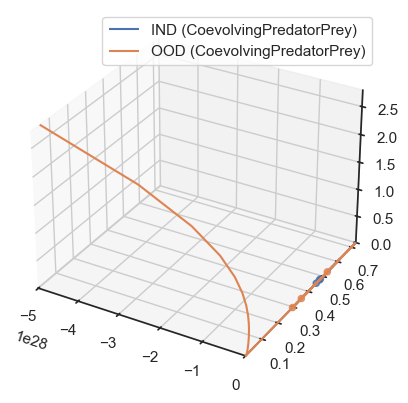

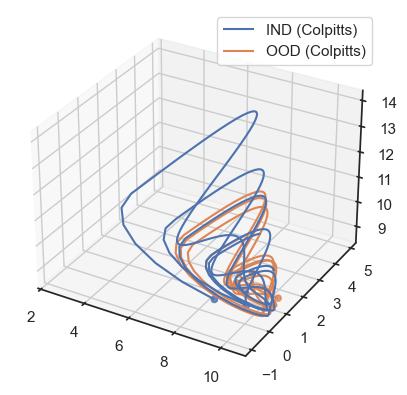

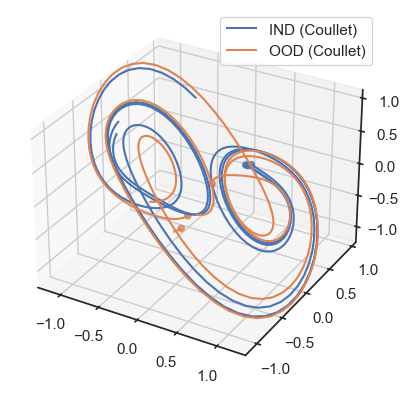

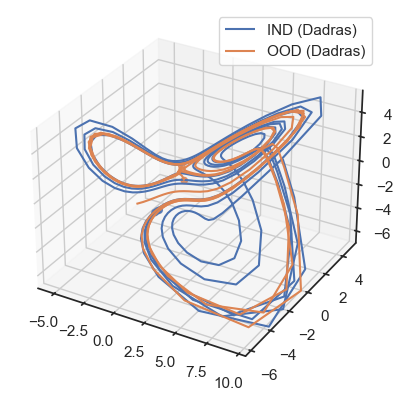

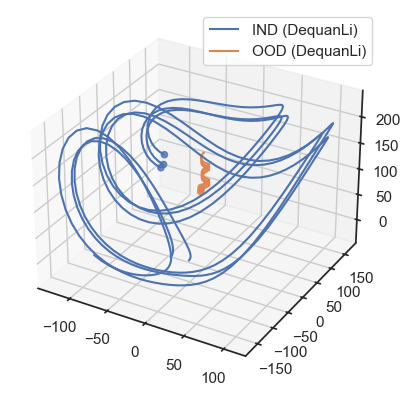

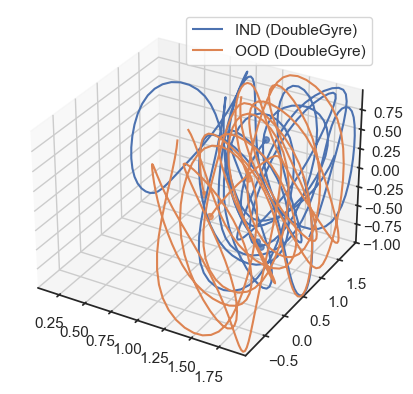

Inputted embedded dimension of 3, but Gilpin's system has an embedded dimension of 4. Adjusting the embedded dimension to 4.
Inputted latent dimension of 3, but Gilpin's system has a dimension of 4. Adjusting the latent dimension to 4.


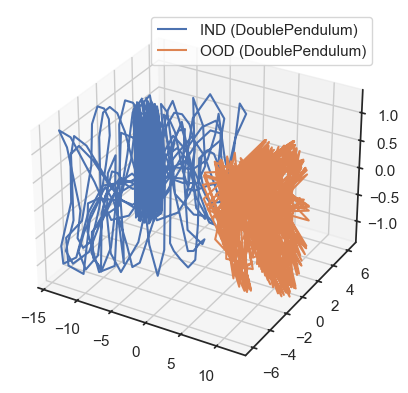

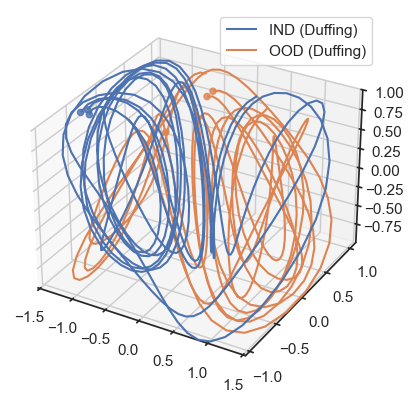

/Users/kanwal/Playground/dynadojo/.venv/lib/python3.10/site-packages/dysts/flows.py:1565: RuntimeWarning: overflow encountered in exp
  alpham = 0.1 * (25 + v) / (1 - np.exp(-0.1 * v - 2.5))
/Users/kanwal/Playground/dynadojo/.venv/lib/python3.10/site-packages/dysts/flows.py:1566: RuntimeWarning: overflow encountered in exp
  betam = 4 * np.exp(-(v + 50) / 18)
/Users/kanwal/Playground/dynadojo/.venv/lib/python3.10/site-packages/dysts/flows.py:1569: RuntimeWarning: overflow encountered in exp
  alphah = 0.07 * np.exp(-0.05 * v - 2.5)
/Users/kanwal/Playground/dynadojo/.venv/lib/python3.10/site-packages/dysts/flows.py:1570: RuntimeWarning: overflow encountered in exp
  betah = 1 / (1 + np.exp(-0.1 * v - 2))
/Users/kanwal/Playground/dynadojo/.venv/lib/python3.10/site-packages/dysts/flows.py:1571: RuntimeWarning: invalid value encountered in scalar divide
  hinf = alphah / (alphah + betah)
/Users/kanwal/Playground/dynadojo/.venv/lib/python3.10/site-packages/dysts/flows.py:1573: RuntimeWarnin

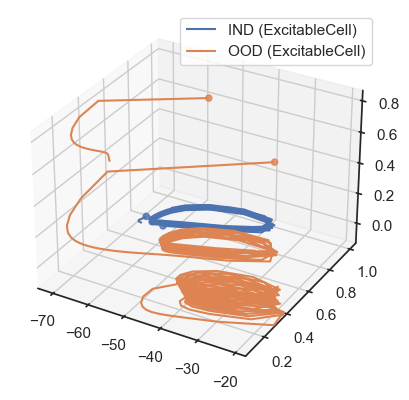

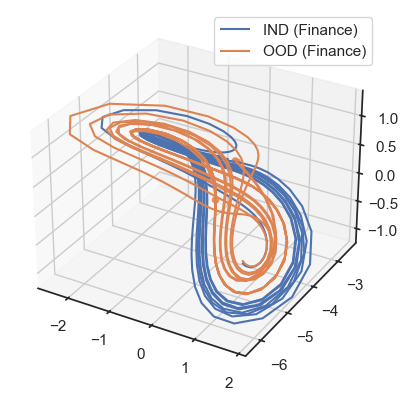

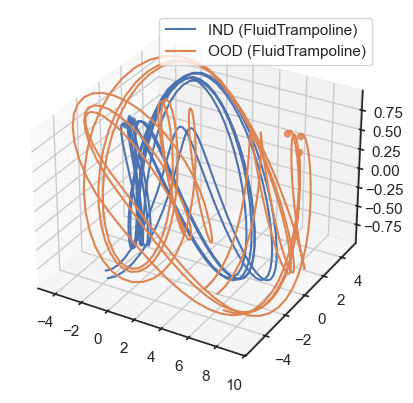

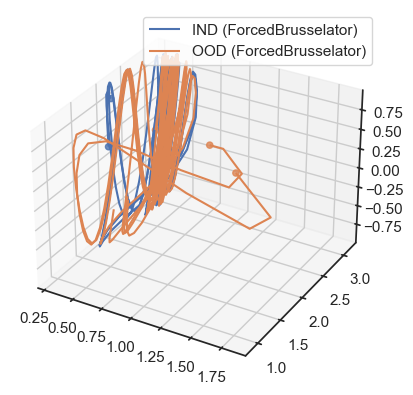

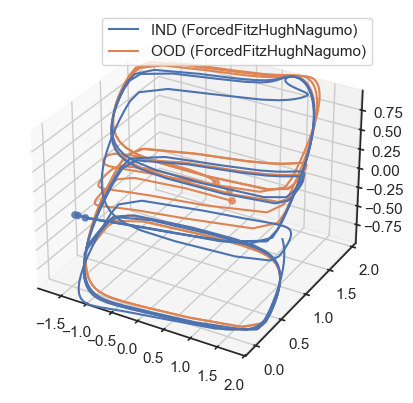

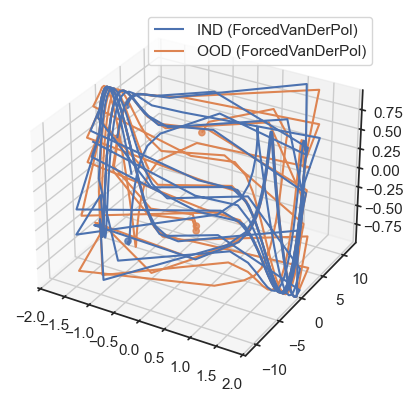

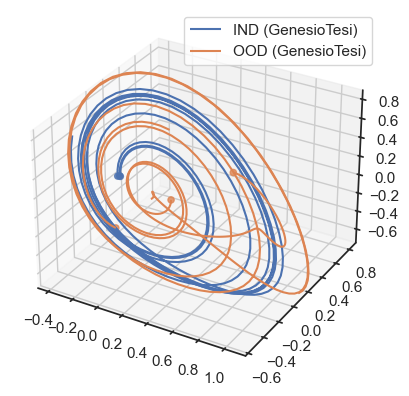

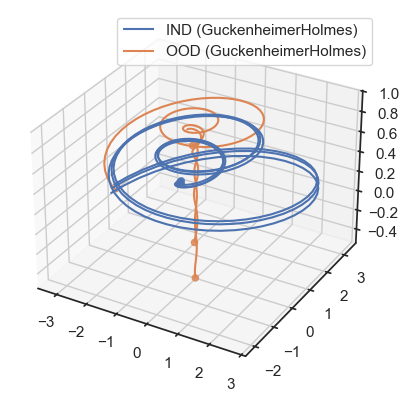

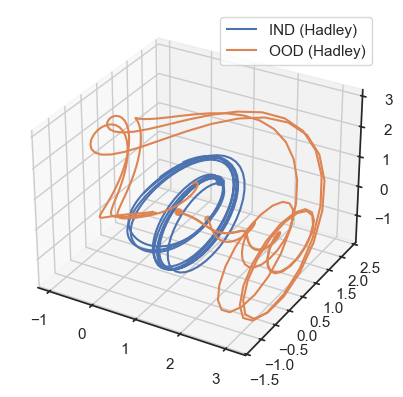

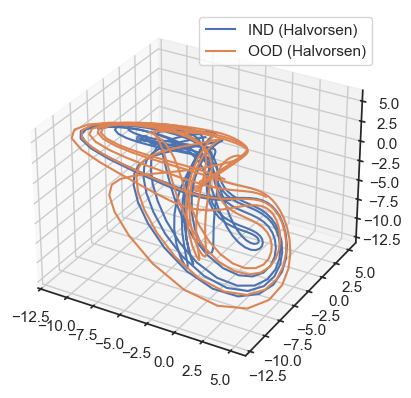

/Users/kanwal/Playground/dynadojo/.venv/lib/python3.10/site-packages/dysts/flows.py:1891: RuntimeWarning: overflow encountered in scalar multiply
  ydot = y * a1 * x / (1 + b1 * x) - z * a2 * y / (1 + b2 * y) - d1 * y
/Users/kanwal/Playground/dynadojo/.venv/lib/python3.10/site-packages/dysts/flows.py:1892: RuntimeWarning: overflow encountered in scalar multiply
  zdot = z * a2 * y / (1 + b2 * y) - d2 * z


ValueError: array must not contain infs or NaNs

In [10]:
import matplotlib.pyplot as plt
# plot in-distribution and out-of-distribution trajectories for all Gilpin systems
for name in GilpinFlowsSystem.all_systems():
    system = SystemChecker(GilpinFlowsSystem(system_name=name, pts_per_period=50))
    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(5, in_dist=False)
    x = system.make_data(x0, timesteps=150)
    y = system.make_data(y0, timesteps=150)
    labels = [f"IND ({name})", f"OOD ({name})"]
    plot([x, y], target_dim=3, labels=labels, max_lines=test_size)
    plt.show()